# 4.1 Basic AE model

## 1. Using CIFAR10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml

from sklearn import model_selection

In [26]:
cifar10 = keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [28]:
x_train = x_train.reshape((-1, 32*32*3))
x_test = x_test.reshape((-1, 32*32*3))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 3072)
(50000, 1)
(10000, 3072)
(10000, 1)


In [29]:
from sklearn.preprocessing import LabelBinarizer

x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

In [30]:
from keras import layers, models

input_shape = (32*32*3)

input = layers.Input(input_shape)
encoder1 = layers.Dense(600, activation='relu')(input)
encoder2 = layers.Dense(300, activation='relu')(encoder1)
encoder3 = layers.Dense(100, activation='relu')(encoder2)

decoder1 = layers.Dense(300, activation='relu')(encoder3)
decoder2 = layers.Dense(600, activation='relu')(decoder1)
output = layers.Dense(32*32*3, activation='relu')(decoder2)

AE = models.Model(input, output)
AE.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
AE.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_30 (Dense)            (None, 600)               1843800   
                                                                 
 dense_31 (Dense)            (None, 300)               180300    
                                                                 
 dense_32 (Dense)            (None, 100)               30100     
                                                                 
 dense_33 (Dense)            (None, 300)               30300     
                                                                 
 dense_34 (Dense)            (None, 600)               180600    
                                                                 
 dense_35 (Dense)            (None, 3072)              1846

In [32]:
history = AE.fit(x_train_scaled, x_train_scaled, validation_data = [x_test_scaled, x_test_scaled], batch_size=32, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 7/20
1563/

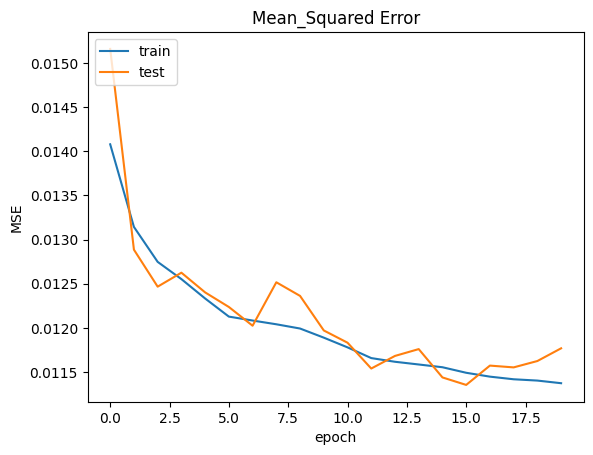

In [33]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean_Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [35]:
decoded_img = AE.predict(x_train_scaled[3].reshape(-1,32*32*3))

1/1 [==============================] - 0s 117ms/step


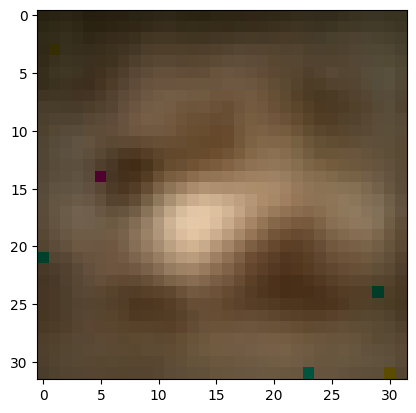

In [41]:
plt.imshow(decoded_img.reshape(32,32,3))

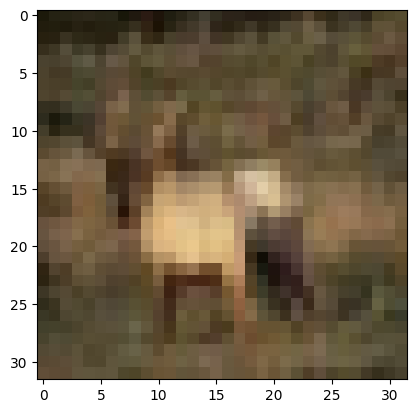

In [42]:
plt.imshow(x_train_scaled[3].reshape(32,32,3))

## 2. Using Fashion Mnist

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

fmnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fmnist.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [45]:
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

In [46]:
x_train_scaled = x_train_scaled.reshape(-1, 28*28)
x_test_scaled = x_test_scaled.reshape(-1, 28*28)

In [50]:
print(x_train_scaled.shape, y_train.shape, x_test_scaled.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [51]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

In [52]:
from keras import layers, models

input_shape = (28*28*1)

input = layers.Input(input_shape)
encoder1 = layers.Dense(600, activation='relu')(input)
encoder2 = layers.Dense(300, activation='relu')(encoder1)
encoder3 = layers.Dense(100, activation='relu')(encoder2)

decoder1 = layers.Dense(300, activation='relu')(encoder3)
decoder2 = layers.Dense(600, activation='relu')(decoder1)
output = layers.Dense(28*28*1, activation='relu')(decoder2)

DAE = models.Model(input, output)
DAE.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
DAE.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_42 (Dense)            (None, 600)               471000    
                                                                 
 dense_43 (Dense)            (None, 300)               180300    
                                                                 
 dense_44 (Dense)            (None, 100)               30100     
                                                                 
 dense_45 (Dense)            (None, 300)               30300     
                                                                 
 dense_46 (Dense)            (None, 600)               180600    
                                                                 
 dense_47 (Dense)            (None, 784)               4711

In [56]:
x_train_noisy = x_train_scaled + np.random.normal(0,1,size=(x_train_scaled.shape[0], 28*28*1))
x_test_noisy = x_test_scaled + np.random.normal(0,1,size=(x_test_scaled.shape[0], 28*28*1))

In [58]:
history = DAE.fit(x_train_noisy, x_train_scaled, validation_data = [x_test_noisy, x_test_scaled], batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 7/20
1875/

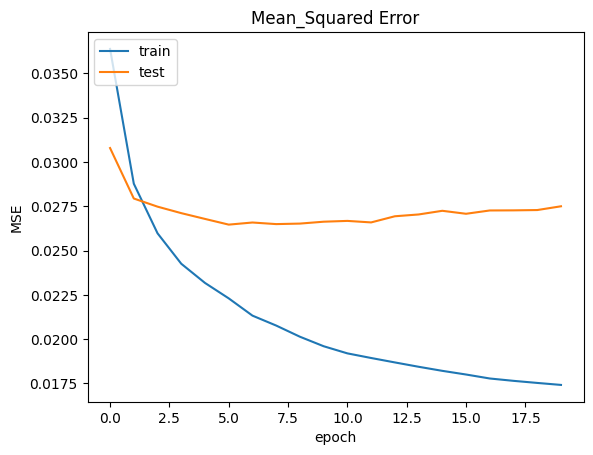

In [59]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean_Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

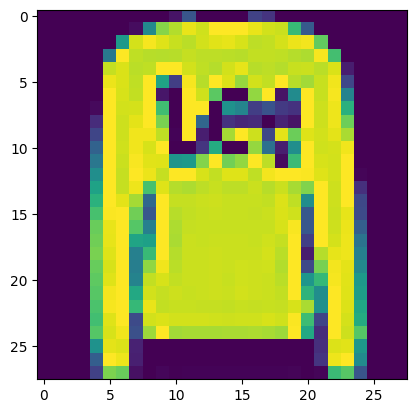

In [60]:
plt.imshow(x_test_scaled[1].reshape(28,28,1))

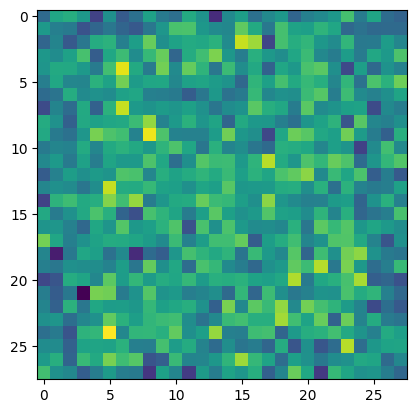

In [61]:
plt.imshow(x_test_noisy[1].reshape(28,28,1))

1/1 [==============================] - 0s 187ms/step


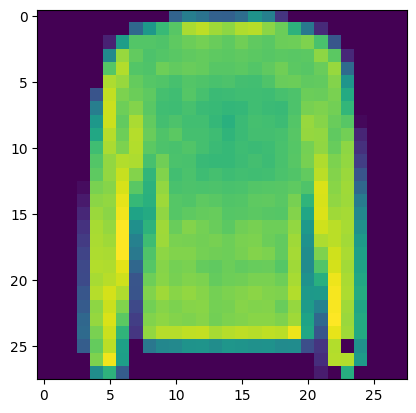

In [63]:
decoded_img = DAE.predict(x_test_noisy[1].reshape(-1, 28*28))
plt.imshow(decoded_img.reshape(28,28))